### ~Rental house market project of Türkiye with selenium, sklearn, seaborn, matplotlib, pandas, numpy libraries.

#### 1- Web Scraping
#### 2- Data Analysis
#### 3- Data Visualization
#### 4- Machine Learning


# 1- Web Scraping

In [2]:

# We should install and set up 'chrome driver' on computer.

# We should do 'pip install Selenium'
import selenium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary modules for web browsing with Selenium.
from selenium import webdriver
from selenium.webdriver.common.by import By

# Import functions for waiting.
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions

# Import exceptions for error handling.
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException


#### LIST OF TURKIYE DISTRICTS

In [412]:
# Create a Chrome WebDriver instance to open a new Chrome window.
driver = webdriver.Chrome()

# Create a WebDriverWait instance to wait for elements on the web page.
wait = WebDriverWait(driver, 4)

# Open the website.
driver.get("https://www.drdatastats.com/turkiye-il-ve-ilceler-listesi/")

# Create a list to store the information to be extracted from the website.
ilce_list = []

# Wait until the table is visible on the page.
wait.until(expected_conditions.visibility_of_element_located((By.XPATH, "/html/body/div[5]/div[2]/div/div[2]/div/div/article/div[3]/figure[1]/table/tbody")))

# Find all the rows in the table.
rows = driver.find_elements(By.XPATH, "/html/body/div[5]/div[2]/div/div[2]/div/div/article/div[3]/figure[1]/table/tbody/tr")

# Iterate through the rows in the table.
for i in range(len(rows)-1):
    
    # Extract the XPath for the district (ilçe).
    ilce_path = f"/html/body/div[5]/div[2]/div/div[2]/div/div/article/div[3]/figure[1]/table/tbody/tr[{i+2}]/td[3]"
    
    # Find and extract the district (ilçe) text.
    ilce = driver.find_element(By.XPATH, ilce_path)
    ilce = ilce.text
    
    # Check if the district is not "Merkez" and add it to the list directly.
    if ilce != "Merkez":
        ilce_list.append(ilce)
        
    # If it's "Merkez," also extract the province (il) and combine them.    
    else:
        il_path = f"/html/body/div[5]/div[2]/div/div[2]/div/div/article/div[3]/figure[1]/table/tbody/tr[{i+2}]/td[2]"
        il = driver.find_element(By.XPATH, il_path)
        il = il.text
        ilce_list.append((il + " " + ilce))

driver.quit()

In [413]:
print(ilce_list[:10])
print(ilce_list[len(ilce_list)-1])

['Aladağ', 'Ceyhan', 'Çukurova', 'Feke', 'İmamoğlu', 'Karaisalı', 'Karataş', 'Kozan', 'Pozantı', 'Saimbeyli']
Zonguldak Merkez


#### RENTAL HOUSING ADVERTISEMENTS IN EVERY DISTRICT

In [ ]:
# Open a Chrome window - create a driver instance.
driver = webdriver.Chrome()

# Create a WebDriverWait instance to wait for elements on the web page.
wait = WebDriverWait(driver, 5)

# Open the website.
driver.get("https://www.emlakjet.com/kiralik-konut/")

# Close the pop-up bar that appears at the bottom of the first page.
close_button = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[5]/div[2]/div/button/span[1]")
close_button.click()

# Create a list to store the information to be extracted from the website.
list_before_excel = []

# Turn through the district list.
for j in range(446, len(ilce_list)):
    
        # Wait for the district input field to be clickable. Click and write district to input.
    wait.until(expected_conditions.element_to_be_clickable((By.XPATH, "/html/body/div/div/div[3]/div[1]/div/div[5]/div/div/div[2]/div[2]/div/input")))
    ilce_input = driver.find_element(By.XPATH, "/html/body/div/div/div[3]/div[1]/div/div[5]/div/div/div[2]/div[2]/div/input")
    ilce_input.click()                          
    ilce_input.send_keys(ilce_list[j])
 
    # Wait for the search button to be clickable and click.
    wait.until(expected_conditions.element_to_be_clickable((By.XPATH, "html/body/div/div/div[3]/div[1]/div/div[5]/div/div/button")))
    search_button = driver.find_element(By.XPATH, "html/body/div/div/div[3]/div[1]/div/div[5]/div/div/button")
    search_button.click()
    
    # Turn all pages for one district.
    for one_page in range(40):
        try:
            try:
                # Find elements with the class name of the advert listings on the first page.
                wait.until(expected_conditions.visibility_of_all_elements_located((By.CLASS_NAME, "manJWF")))
                elements = driver.find_elements(By.CLASS_NAME, "manJWF")
                
                # Turn through advert boxes on a page.
                for element in elements:
                    # Append advert information to list.
                    list_before_excel.append(element.text.split("\n"))

                # Click the "Next" button to go to the next page.      
                wait.until(expected_conditions.visibility_of_all_elements_located((By.CLASS_NAME, "_3au2n_.OTUgAO")))
                next_button = driver.find_element(By.CLASS_NAME, "_3au2n_.OTUgAO")
                next_button.click()                                  
                
            # if StaleElementReferenceException occurs refresh web page and run same codes above       
            except StaleElementReferenceException:
                driver.refresh()
                
                # Find elements with the class name of the property listings on the first page.
                wait.until(expected_conditions.visibility_of_all_elements_located((By.CLASS_NAME, "manJWF")))
                elements = driver.find_elements(By.CLASS_NAME, "manJWF")
                
                # Iterate through property listings on one page.
                for element in elements:
                    # Append property information to the list.
                    list_before_excel.append(element.text.split("\n"))

                # Find the 'next_button' again.   
                wait.until(expected_conditions.visibility_of_all_elements_located((By.CLASS_NAME, "_3au2n_.OTUgAO")))
                next_button = driver.find_element(By.CLASS_NAME, "_3au2n_.OTUgAO")
                next_button.click()
                
        # İf there aren't 'advert' or 'next_button' in page, move to next district.            
        # So if these errors occurs from the try block above; remove the (il, ilçe) and break loop    
        except (NoSuchElementException, TimeoutException, IndexError):
            try:
                # If (il, ilce) cancel buttons are not found(NoSuchElementException), change to second path and try again
                remove_ilce = driver.find_element(By.XPATH, "/html/body/div/div/div[3]/div[1]/div/div[5]/div/div/div[2]/div[2]/div/div[1]/i")
                remove_ilce.click()                     
                remove_il = driver.find_element(By.XPATH, "/html/body/div/div/div[3]/div[1]/div/div[5]/div/div/div[2]/div[2]/div/div/i")
                remove_il.click()                          
            except NoSuchElementException:
                remove_ilce = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div/div[5]/div/div/div[2]/div[2]/div/div[1]/i")
                remove_ilce.click()                          
                remove_il = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div/div[5]/div/div/div[2]/div[2]/div/div/i")
                remove_il.click()                
                
            break


In [24]:
pddf = pd.DataFrame(list_before_excel)
pddf.to_excel("emlakjet.xlsx")

# 2- DATA ANALYSIS

In [4]:
data = pd.read_excel("emlak_jet.xlsx")
df = data.copy()
df.head()


,Source.Name,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
0,emlakjet1.xlsx,a,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,emlakjet1.xlsx,0,edomer gayrimenkulden f.s.m. mahallesinde kira...,home,Müstakil Ev,weekend,3+1,texture,150 m2,event,22 Eylül,8.000 TL,Adana - Ceyhan - Fatih Sultan Mehmet Mh.,NaN,NaN,NaN,NaN,NaN
2,emlakjet1.xlsx,1,çinar emlak'tan cumhuri̇yet mh. ki̇ralik 2+1 d...,home,Daire,weekend,2+1,layers,5. Kat,texture,130 m2,event,21 Eylül,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
3,emlakjet1.xlsx,2,yurdal emlak'tan ki̇ralik 4+1 dai̇re,home,Daire,weekend,4+1,layers,Yüksek giriş,texture,180 m2,event,20 Eylül,12.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
4,emlakjet1.xlsx,3,mi̇ra emlak'tan cumhuri̇yet mah.de az hasarli ...,...,home,Daire,weekend,2+1,layers,7. Kat,texture,115 m2,event,20 Eylül,7.250 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN


In [5]:
len(df)

35841

In [6]:
df = df.drop(0, axis=0)
df = df.drop("Source.Name", axis=1)

df.head(4)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
1,0,edomer gayrimenkulden f.s.m. mahallesinde kira...,home,Müstakil Ev,weekend,3+1,texture,150 m2,event,22 Eylül,8.000 TL,Adana - Ceyhan - Fatih Sultan Mehmet Mh.,NaN,NaN,NaN,NaN,NaN
2,1,çinar emlak'tan cumhuri̇yet mh. ki̇ralik 2+1 d...,home,Daire,weekend,2+1,layers,5. Kat,texture,130 m2,event,21 Eylül,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
3,2,yurdal emlak'tan ki̇ralik 4+1 dai̇re,home,Daire,weekend,4+1,layers,Yüksek giriş,texture,180 m2,event,20 Eylül,12.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
4,3,mi̇ra emlak'tan cumhuri̇yet mah.de az hasarli ...,...,home,Daire,weekend,2+1,layers,7. Kat,texture,115 m2,event,20 Eylül,7.250 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN


In [7]:
# Reindex index number like starting from 0.
# Add list of new_index to the DataFrame as a new column and set new_index to real index numbers
df[''] = np.arange(len(df))
df = df.set_index('')

df.head(4)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
,,,,,,,,,,,,,,,,,
0,0,edomer gayrimenkulden f.s.m. mahallesinde kira...,home,Müstakil Ev,weekend,3+1,texture,150 m2,event,22 Eylül,8.000 TL,Adana - Ceyhan - Fatih Sultan Mehmet Mh.,NaN,NaN,NaN,NaN,NaN
1,1,çinar emlak'tan cumhuri̇yet mh. ki̇ralik 2+1 d...,home,Daire,weekend,2+1,layers,5. Kat,texture,130 m2,event,21 Eylül,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
2,2,yurdal emlak'tan ki̇ralik 4+1 dai̇re,home,Daire,weekend,4+1,layers,Yüksek giriş,texture,180 m2,event,20 Eylül,12.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
3,3,mi̇ra emlak'tan cumhuri̇yet mah.de az hasarli ...,...,home,Daire,weekend,2+1,layers,7. Kat,texture,115 m2,event,20 Eylül,7.250 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN


In [8]:
# Swipe cell that write '...' to one cell left
for i in range(len(df)):
    if df.iloc[i,2] == "...":
        j=2
        while j<16:
            df.iloc[i,j] = df.iloc[i,j+1]
            j+=1
df.head(4)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
,,,,,,,,,,,,,,,,,
0,0,edomer gayrimenkulden f.s.m. mahallesinde kira...,home,Müstakil Ev,weekend,3+1,texture,150 m2,event,22 Eylül,8.000 TL,Adana - Ceyhan - Fatih Sultan Mehmet Mh.,NaN,NaN,NaN,NaN,NaN
1,1,çinar emlak'tan cumhuri̇yet mh. ki̇ralik 2+1 d...,home,Daire,weekend,2+1,layers,5. Kat,texture,130 m2,event,21 Eylül,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
2,2,yurdal emlak'tan ki̇ralik 4+1 dai̇re,home,Daire,weekend,4+1,layers,Yüksek giriş,texture,180 m2,event,20 Eylül,12.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
3,3,mi̇ra emlak'tan cumhuri̇yet mah.de az hasarli ...,home,Daire,weekend,2+1,layers,7. Kat,texture,115 m2,event,20 Eylül,7.250 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN


In [9]:
# Drop rows except "Residence" and "Daire"
for i in range(len(df)):
    if df["Column4"][i] != "Residence" and df["Column4"][i] != "Daire":
        df = df.drop(i, axis=0)
        
df.head(4)  

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
,,,,,,,,,,,,,,,,,
1,1,çinar emlak'tan cumhuri̇yet mh. ki̇ralik 2+1 d...,home,Daire,weekend,2+1,layers,5. Kat,texture,130 m2,event,21 Eylül,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
2,2,yurdal emlak'tan ki̇ralik 4+1 dai̇re,home,Daire,weekend,4+1,layers,Yüksek giriş,texture,180 m2,event,20 Eylül,12.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
3,3,mi̇ra emlak'tan cumhuri̇yet mah.de az hasarli ...,home,Daire,weekend,2+1,layers,7. Kat,texture,115 m2,event,20 Eylül,7.250 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
4,4,edomer gayrimenkul'den n.kemal mah. kiralık 3+...,home,Daire,weekend,3+1,layers,3. Kat,texture,125 m2,event,17 Eylül,130.000 TL,Adana - Ceyhan - Namık Kemal Mh.,NaN,NaN,NaN


In [10]:
df[''] = np.arange(len(df))
df = df.set_index('')

In [11]:
len(df)

33293

In [12]:
# Create a list of the columns_to_keep with column(6,10,13,14)
columns_to_keep = [f"Column{i}" for i in [6, 10, 13, 14]]

# Drop colums that not necessary for us
for column in df.columns:
    if column not in columns_to_keep:
        df = df.drop(column, axis=1)
    
df.head()

,Column6,Column10,Column13,Column14
,,,,
0,2+1,130 m2,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.
1,4+1,180 m2,12.000 TL,Adana - Ceyhan - Cumhuriyet Mh.
2,2+1,115 m2,7.250 TL,Adana - Ceyhan - Cumhuriyet Mh.
3,3+1,125 m2,130.000 TL,Adana - Ceyhan - Namık Kemal Mh.
4,3+1,185 m2,11.500 TL,Adana - Ceyhan - Hürriyet Mh.


In [13]:
# rename column name
df.rename(columns = {'Column6':  'room',   'Column10': 'm²',
                     'Column13': 'price',  'Column14': 'address'}, inplace = True)    
df.head(1)

,room,m²,price,address
,,,,
0,2+1,130 m2,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.


In [14]:
# Delete extentions of "m²", "price", "address"
df["m²"     ] = df["m²"     ].str.slice(0, -3)
df["price"  ] = df["price"  ].str.slice(0, -3)
df["address"] = df["address"].str.slice(0, -4)

df.head()

,room,m²,price,address
,,,,
0,2+1,130,7.000,Adana - Ceyhan - Cumhuriyet
1,4+1,180,12.000,Adana - Ceyhan - Cumhuriyet
2,2+1,115,7.250,Adana - Ceyhan - Cumhuriyet
3,3+1,125,130.000,Adana - Ceyhan - Namık Kemal
4,3+1,185,11.500,Adana - Ceyhan - Hürriyet


In [15]:
# Split "address" to tree column that "city", "district", "neighborhood"
df = df.assign(
    city         = df["address"].str.split(" - ").str[0],
    district     = df["address"].str.split(" - ").str[1],
    neighborhood = df["address"].str.split(" - ").str[2]
)

df.head()

,room,m²,price,address,city,district,neighborhood
,,,,,,,
0,2+1,130,7.000,Adana - Ceyhan - Cumhuriyet,Adana,Ceyhan,Cumhuriyet
1,4+1,180,12.000,Adana - Ceyhan - Cumhuriyet,Adana,Ceyhan,Cumhuriyet
2,2+1,115,7.250,Adana - Ceyhan - Cumhuriyet,Adana,Ceyhan,Cumhuriyet
3,3+1,125,130.000,Adana - Ceyhan - Namık Kemal,Adana,Ceyhan,Namık Kemal
4,3+1,185,11.500,Adana - Ceyhan - Hürriyet,Adana,Ceyhan,Hürriyet


In [16]:
df = df.drop("address", axis=1)

In [17]:
# To make "price" and "m²" integer.
for i in range(len(df)):
    df["price"][i] = df["price"][i].replace("." , "") 

# 2.way
#df["price"] = df["price"].astype(float)

df["price"] = df["price"].astype(int)
df["m²"   ] = df["m²"   ].astype(int)

df.head()

,room,m²,price,city,district,neighborhood
,,,,,,
0,2+1,130,7000,Adana,Ceyhan,Cumhuriyet
1,4+1,180,12000,Adana,Ceyhan,Cumhuriyet
2,2+1,115,7250,Adana,Ceyhan,Cumhuriyet
3,3+1,125,130000,Adana,Ceyhan,Namık Kemal
4,3+1,185,11500,Adana,Ceyhan,Hürriyet


In [18]:
print(df["m²"].dtype)
print(df["price"].dtype)

int32
int32


In [19]:
# Drop outlier "m²" values.
# Drop limited to between 300 and 20  for now...
# if "m²">300 or "m²"<20 drop this row

for i in range(len(df)):
    if df["m²"][i]>300 or df["m²"][i]<20:
        df = df.drop(i, axis=0)
        
# Reindex index number
df[''] = np.arange(len(df))
df = df.set_index('')

<Axes: xlabel='m²'>

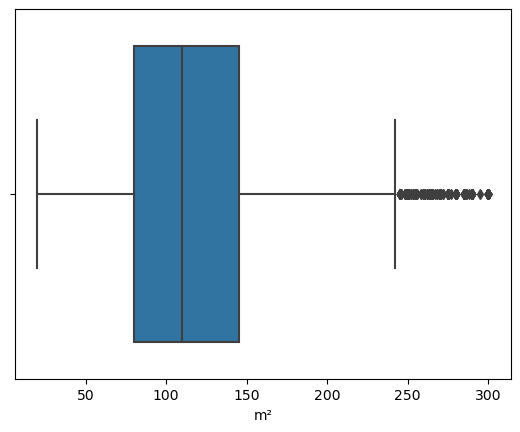

In [20]:
# Wiew m² outliars in seaborn boxplot

m = df["m²"]
sns.boxplot(x = m)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
m²,32892.0,116.690533,4.799438e+01,2.000000e+01,80.0,110.0,145.0,300.0
price,32892.0,-18103.591572,1.185762e+07,-2.147484e+09,10000.0,13500.0,19000.0,50000000.0


In [22]:
# learn index of m² outliars
outliars = df["m²"] > (145 + (3/2*(145-80)))
df[outliars].index

Int64Index([   51,   137,   211,   227,   228,   235,   256,   305,   310,
              435,
            ...
            32397, 32484, 32592, 32687, 32692, 32698, 32703, 32718, 32760,
            32815],
           dtype='int64', name='', length=595)

In [23]:
# drop outlier "m²" values
df = df.drop(df[outliars].index, axis=0)

In [24]:
# Reindex index number. 
df[''] = np.arange(len(df))
df = df.set_index('')

<Axes: xlabel='m²'>

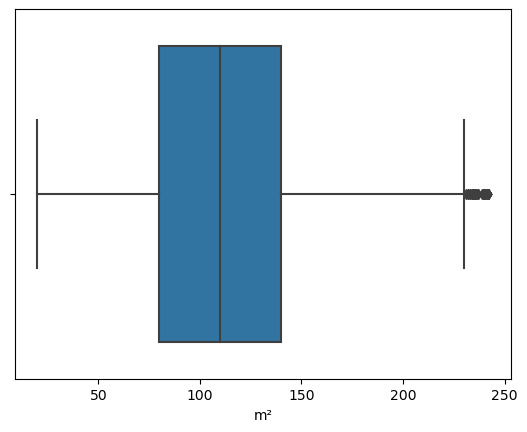

In [25]:
# wiew outliars m² in seaborn boxplot again.
m = df["m²"]
sns.boxplot(x = m)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
m²,32297.0,113.922532,4.376906e+01,2.000000e+01,80.0,110.0,140.0,242.0
price,32297.0,-22553.692882,1.196235e+07,-2.147484e+09,10000.0,13500.0,18500.0,49000000.0


In [27]:
# learn index of m² outliars
outliars = df["m²"] > (140 + (3/2*(140-80)))

# drop outliers "m²" again.
df = df.drop(df[outliars].index, axis=0)
df[''] = np.arange(len(df))
df = df.set_index('')

<Axes: xlabel='m²'>

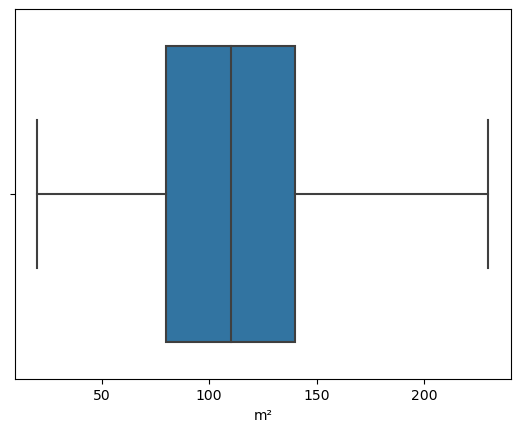

In [28]:
# wiew m² outliars in seaborn boxplot 
m = df["m²"]
sns.boxplot(x = m)

In [29]:
# Deleting outlier "price" values.
# Drop outlier "price" values between 2000 and 75000 for now...
# if "price">75000 or "price"<2000 drop that row.

for i in range(len(df)):
    if df["price"][i]>75000 or df["price"][i]<2000:
        df = df.drop(i, axis=0)
        
df[''] = np.arange(len(df))
df = df.set_index('')

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
m²,29861.0,113.667057,41.514222,20.0,85.0,110.0,140.0,230.0
price,29861.0,15412.878169,9355.479629,2000.0,10000.0,13500.0,18000.0,75000.0


In [31]:
# sort column names
df = df.reindex(["city", "district", "neighborhood", "room", "m²", "price"], axis=1)
df.head()

,city,district,neighborhood,room,m²,price
,,,,,,
0,Adana,Ceyhan,Cumhuriyet,2+1,130,7000
1,Adana,Ceyhan,Cumhuriyet,4+1,180,12000
2,Adana,Ceyhan,Cumhuriyet,2+1,115,7250
3,Adana,Ceyhan,Hürriyet,3+1,185,11500
4,Adana,Ceyhan,Ulus,3+1,165,9000


In [33]:
# replace "Stüdyo" to "1+0"
for i in range(len(df)):
    if df["room"][i]=="Stüdyo":
        df["room"][i]="1+0"

In [34]:
# Drop room numbers that not important like "2.5+1", "5+1", "2+0"
for i in range(len(df)):
    if df["room"][i] not in ["1+0", "1+1", "2+1", "3+1", "4+1"]:
        df = df.drop(i, axis=0)

In [35]:
df[''] = np.arange(len(df))
df = df.set_index('')

In [36]:
df

,city,district,neighborhood,room,m²,price
,,,,,,
0,Adana,Ceyhan,Cumhuriyet,2+1,130,7000
1,Adana,Ceyhan,Cumhuriyet,4+1,180,12000
2,Adana,Ceyhan,Cumhuriyet,2+1,115,7250
3,Adana,Ceyhan,Hürriyet,3+1,185,11500
4,Adana,Ceyhan,Ulus,3+1,165,9000
...,...,...,...,...,...,...
28572,Yozgat,Yerköy,100. Yıl,3+1,135,4250
28573,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250
28574,Yozgat,Yerköy,100. Yıl,3+1,140,3250


In [43]:
df[df.isnull().any(axis=1)]

,city,district,neighborhood,room,m²,price
,,,,,,
25,arrow_down,NaN,NaN,2+1,100,9250
37,arrow_down,NaN,NaN,3+1,160,9000
112,arrow_down,NaN,NaN,3+1,140,10000
127,arrow_down,NaN,NaN,1+1,55,11000
139,arrow_down,NaN,NaN,3+1,120,10000
...,...,...,...,...,...,...
28530,arrow_down,NaN,NaN,1+1,55,7200
28533,arrow_down,NaN,NaN,3+1,135,10500
28569,arrow_down,NaN,NaN,4+1,180,7750


In [44]:
# Drop rows that include null values  and show how many rows are droped
a = len(df)
df = df.dropna()
a-len(df)

2933

In [48]:
df[''] = np.arange(len(df))
df = df.set_index('')

### Cleaning outlier 'm²' values

count    522.000000
mean      44.306513
std       17.691153
min       20.000000
25%       35.000000
50%       40.000000
75%       53.500000
max      220.000000
Name: m², dtype: float64

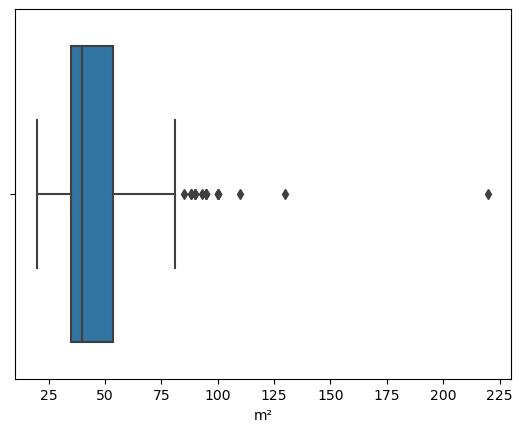

In [49]:
# wiew and drop outliar "m²" for "1+0" room type
room0 = df[df["room"]=="1+0"]

sns.boxplot(x = room0["m²"])
room0["m²"].describe()

In [50]:
outliars = room0["m²"]> 53.5 + 3/2*(53.5-35)
room0[outliars].index

Int64Index([ 1187,  5378, 10091, 10425, 14623, 14624, 14998, 15740, 15762,
            15799, 16484, 18034, 18384, 20602, 20604, 22301, 25261],
           dtype='int64', name='')

In [51]:
df = df.drop(room0[outliars].index, axis=0)
df[""]= np.arange(len(df))
df = df.set_index("")

count    4963.000000
mean       66.152730
std        16.321008
min        20.000000
25%        55.000000
50%        65.000000
75%        75.000000
max       225.000000
Name: m², dtype: float64

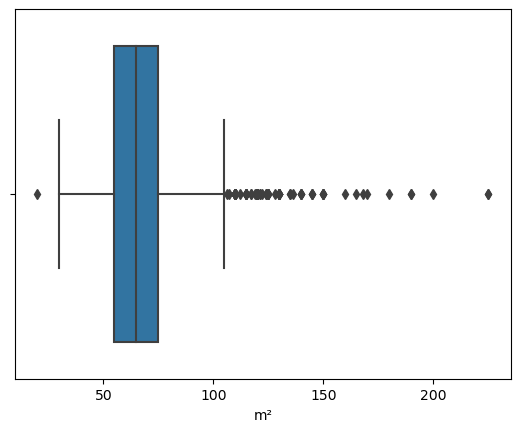

In [52]:
# wiew and drop outliar "m²" for "1+1" room type
room1 = df[df["room"]=="1+1"]

sns.boxplot(x = room1["m²"])
room1["m²"].describe()

In [53]:
outliars = room1["m²"] > 75 + 3/2*(75-55)

df = df.drop(room1[outliars].index, axis=0)
df[""]= np.arange(len(df))
df = df.set_index("")

count    9453.000000
mean      101.367820
std        20.799219
min        30.000000
25%        90.000000
50%       100.000000
75%       110.000000
max       230.000000
Name: m², dtype: float64

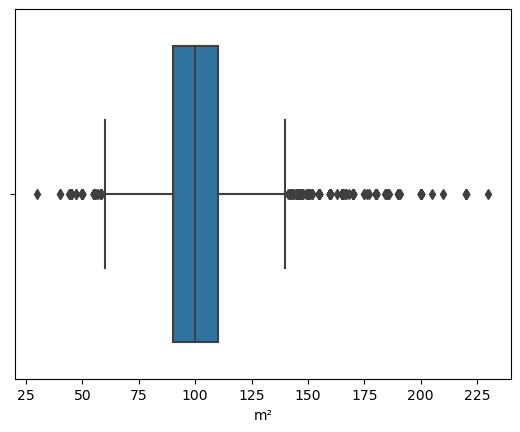

In [54]:
# wiew and drop outliar "m²" for "2+1" room type
room2 = df[df["room"]=="2+1"]

sns.boxplot(x = room2["m²"])
room2["m²"].describe()

In [55]:
outliars = room2["m²"] < 90-3/2*(110-90)

df = df.drop(room2[outliars].index, axis=0)
df[""]= np.arange(len(df))
df = df.set_index("")

In [56]:
outliars2 = room2["m²"] > 90+3*(110-90)

df = df.drop(room2[outliars2].index, axis=0)
df[""]= np.arange(len(df))
df = df.set_index("")

count    9388.000000
mean      143.446314
std        24.078765
min        20.000000
25%       125.000000
50%       140.000000
75%       160.000000
max       230.000000
Name: m², dtype: float64

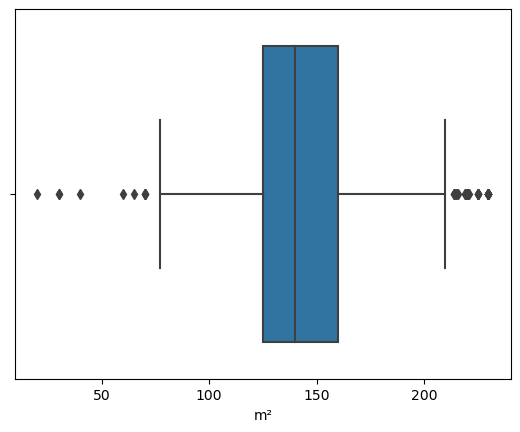

In [57]:
# wiew and drop outliar "m²" for "3+1" room type
room3 = df[df["room"]=="3+1"]

sns.boxplot(x = room3["m²"])
room3["m²"].describe()

In [58]:
outliars = room3["m²"] > 160+3/2*(160-125)

df = df.drop(room3[outliars].index, axis=0)
df[""]= np.arange(len(df))
df = df.set_index("")

In [59]:
outliars2 = room3["m²"] < 125-3/2*(160-125)

df = df.drop(room3[outliars2].index, axis=0)
df[""]= np.arange(len(df))
df = df.set_index("")

count    1260.000000
mean      185.286508
std        27.016360
min        35.000000
25%       165.750000
50%       185.000000
75%       205.000000
max       230.000000
Name: m², dtype: float64

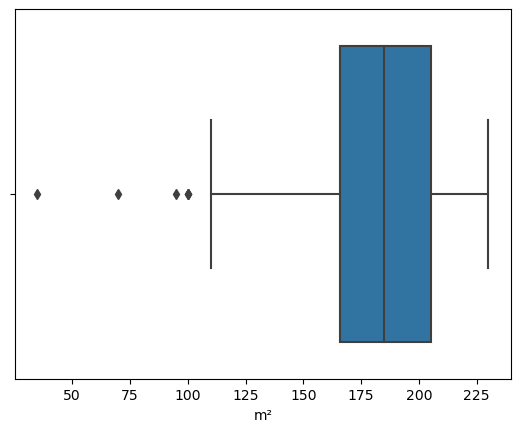

In [60]:
# wiew and drop outliar "m²" for "4+1" room type
room4 = df[df["room"]=="4+1"]

sns.boxplot(x = room4["m²"])
room4["m²"].describe()

In [61]:
outliars = room4["m²"] < 167-3/2*(205-166)

df = df.drop(room4[outliars].index, axis=0)
df[""]= np.arange(len(df))
df = df.set_index("")

### Cleaning outlier prices

count      501.000000
mean      9429.059880
std       5868.507326
min       2000.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      50000.000000
Name: price, dtype: float64

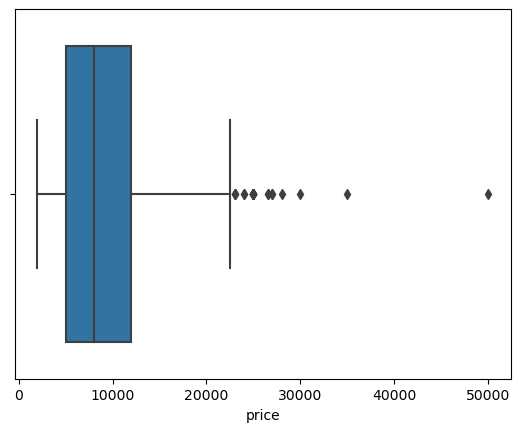

In [62]:
# see and drop "price" outliars for "1+0" room type
room0 = df[df["room"]=="1+0"]
price0 = room0["price"]

sns.boxplot(x = price0)
price0.describe()

In [63]:
outliars = price0[price0>12000+3/2*(12000-5000)].index

df = df.drop(outliars, axis=0)
df[""] = np.arange(len(df))
df = df.set_index("")

count     4822.000000
mean     12573.298009
std       7428.437112
min       2000.000000
25%       8000.000000
50%      11000.000000
75%      15000.000000
max      75000.000000
Name: price, dtype: float64

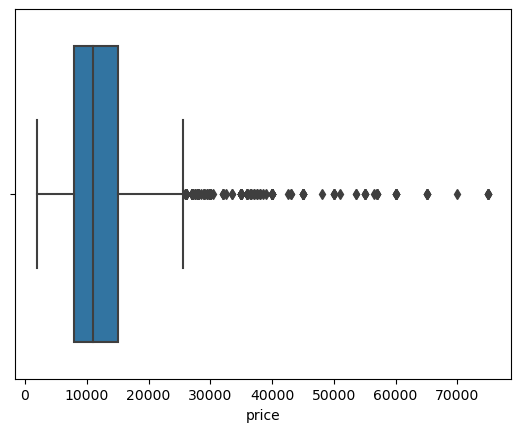

In [64]:
# see and drop "price" outliars for "1+1" room type
room1 = df[df["room"]=="1+1"]
price1 = room1["price"]

sns.boxplot(x = price1)
price1.describe()

In [65]:
outliars = price1[price1>15000+5/2*(15000-8000)].index

df = df.drop(outliars, axis=0)
df[""] = np.arange(len(df))
df = df.set_index("")

count     9315.000000
mean     15489.062909
std       8988.132817
min       2000.000000
25%      10000.000000
50%      13500.000000
75%      18000.000000
max      75000.000000
Name: price, dtype: float64

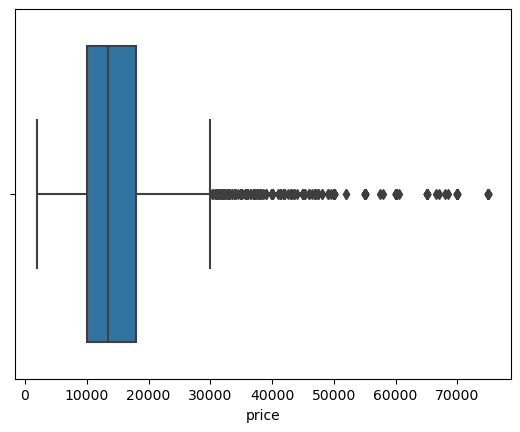

In [66]:
# see and drop "price" outliars for "2+1" room type
room2 = df[df["room"]=="2+1"]
price2 = room2["price"]

sns.boxplot(x = price2)
price2.describe()

In [67]:
outliars = price2[price2>18000+3*(18000-10000)].index

df = df.drop(outliars, axis=0)
df[""] = np.arange(len(df))
df = df.set_index("")

count     9311.000000
mean     16346.559338
std       9377.344170
min       2000.000000
25%      11000.000000
50%      14500.000000
75%      18500.000000
max      75000.000000
Name: price, dtype: float64

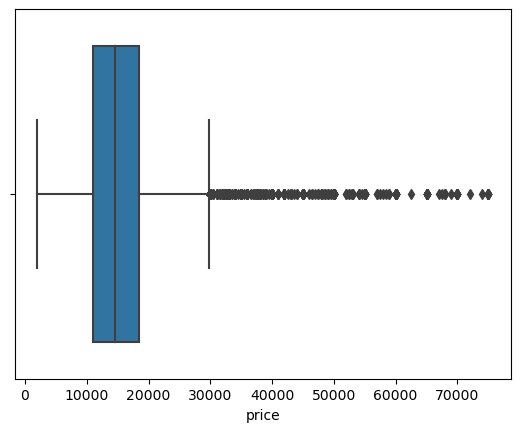

In [68]:
# see and drop "price" outliars for "3+1" room type
room3 = df[df["room"]=="3+1"]
price3 = room3["price"]

sns.boxplot(x = price3)
price3.describe()

In [69]:
outliars = price3[price3>18500+3*(18500-11000)].index

df = df.drop(outliars, axis=0)
df[""] = np.arange(len(df))
df = df.set_index("")

count     1254.000000
mean     21199.503190
std      11387.890829
min       2000.000000
25%      14000.000000
50%      18825.000000
75%      25000.000000
max      75000.000000
Name: price, dtype: float64

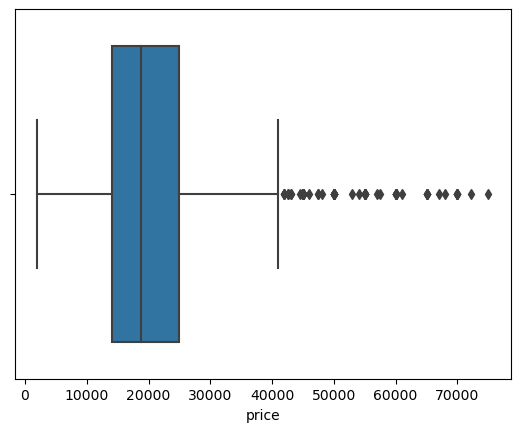

In [70]:
# see and drop "price" outliars for "4+1" room type
room4 = df[df["room"]=="4+1"]
price4 = room4["price"]

sns.boxplot(x = price4)
price4.describe()

In [71]:
outliars = price4[price4>25000+3*(25000-14000)].index

df = df.drop(outliars, axis=0)
df[""] = np.arange(len(df))
df = df.set_index("")

In [123]:
df

,city,district,neighborhood,room,m²,price
,,,,,,
0,Adana,Ceyhan,Cumhuriyet,2+1,130,7000
1,Adana,Ceyhan,Cumhuriyet,4+1,180,12000
2,Adana,Ceyhan,Cumhuriyet,2+1,115,7250
3,Adana,Ceyhan,Hürriyet,3+1,185,11500
4,Adana,Ceyhan,Ulus,3+1,165,9000
...,...,...,...,...,...,...
24604,Yozgat,Sorgun,Yeni,3+1,120,3500
24605,Yozgat,Yerköy,100. Yıl,3+1,135,4250
24606,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250


In [124]:
# save dataframe to excel
df.to_excel("adverts.xlsx")

# 3- Visualization

In [6]:
import pandas as pd

In [7]:
data = pd.read_excel("adverts.xlsx")

In [8]:
df = data.copy()
df.tail()

,Unnamed: 0.1,Unnamed: 0,city,district,neighborhood,room,m²,price
24602,24602,24604,Yozgat,Sorgun,Yeni,3+1,120,3500
24603,24603,24605,Yozgat,Yerköy,100. Yıl,3+1,135,4250
24604,24604,24606,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250
24605,24605,24607,Yozgat,Yerköy,100. Yıl,3+1,140,3250
24606,24606,24608,Zonguldak,Çaycuma,Karamusa,3+1,120,11000


In [127]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.tail()

,city,district,neighborhood,room,m²,price
24604,Yozgat,Sorgun,Yeni,3+1,120,3500
24605,Yozgat,Yerköy,100. Yıl,3+1,135,4250
24606,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250
24607,Yozgat,Yerköy,100. Yıl,3+1,140,3250
24608,Zonguldak,Çaycuma,Karamusa,3+1,120,11000


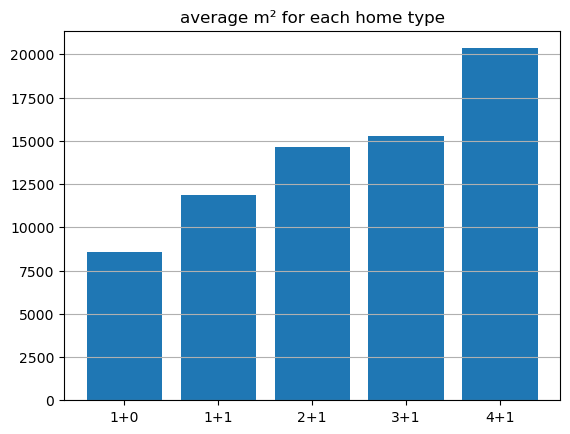

In [153]:
# average price for each home type
y = df.groupby("room")["price"].mean()
x = np.array(["1+0", "1+1", "2+1", "3+1", "4+1"])

plt.grid(axis="y")
plt.title("average m² for each home type")
plt.bar(x,y)
plt.show()

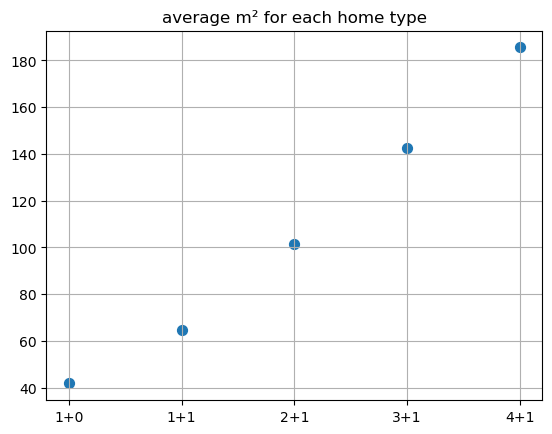

In [140]:
# average m² for each home type
y = df.groupby("room")["m²"].mean()
x = np.array(["1+0", "1+1", "2+1", "3+1", "4+1"])

plt.grid()
plt.title("average m² for each home type")
plt.scatter(x,y, s=50)
plt.show()

In [11]:
# count of home type
# the code below can also write using 'groupby' method!

unique_room_list = df["room"].unique()

twoone= [] # mean of "twoone" is "2+1" house
fourone= []
treeone= []
oneone= []
onezero= []

for i in range(len(df)):
    if unique_room_list[0] == df["room"][i]:
        twoone.append(df["room"][i])
    elif unique_room_list[1] == df["room"][i]:
        fourone.append(df["room"][i])
    elif unique_room_list[2] == df["room"][i]:
        treeone.append(df["room"][i])
    elif unique_room_list[3] == df["room"][i]:
        oneone.append(df["room"][i])
    else:
        onezero.append(df["room"][i])

print(f"count of 4+1 house: {len(fourone)}")
print(f"count of 3+1 house: {len(treeone)}")
print(f"count of 2+1 house: {len(twoone)}")
print(f"count of 1+1 house: {len(oneone)}")
print(f"count of 1+0 house: {len(onezero)}")

count of 4+1 house: 1230
count of 3+1 house: 9054
count of 2+1 house: 9125
count of 1+1 house: 4720
count of 1+0 house: 478


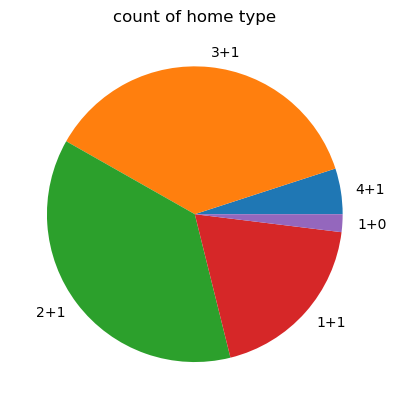

In [131]:
# count of home type
# determination x and y labels of pie chart 
x = np.array(["4+1", "3+1", "2+1", "1+1", "1+0"])
y = np.array([len(fourone), len(treeone), len(twoone), len(oneone), len(onezero)])

# create pie chart
plt.pie(y, labels=x)
plt.title("count of home type")
plt.show()

In [133]:
# Average of rental house prices of each cities
prices_mean_of_each_cities = df.groupby("city")["price"].mean()

prices_mean_of_each_cities = pd.DataFrame(prices_mean_of_each_cities)
prices_mean_of_each_cities.head()

,price
city,
Adana,9260.626620
Adıyaman,10090.909091
Afyonkarahisar,8704.065041
Aksaray,5140.000000
Amasya,8192.647059


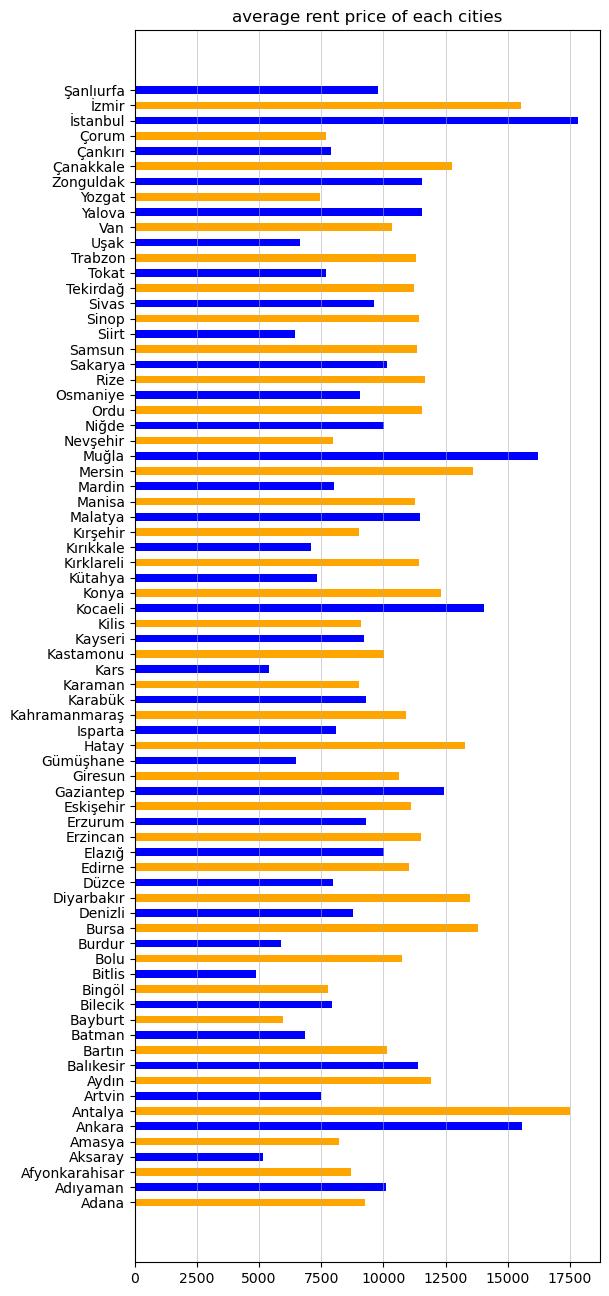

In [139]:
# average rent price of each cities
x = prices_mean_of_each_cities.index
y = prices_mean_of_each_cities["price"]

plt.figure(figsize=(6, 16))
plt.grid(linewidth=0.4,  axis="x")

plt.barh(x, y,  height=0.5,  color=["orange","blue"])

plt.title("average rent price of each cities")

plt.show()

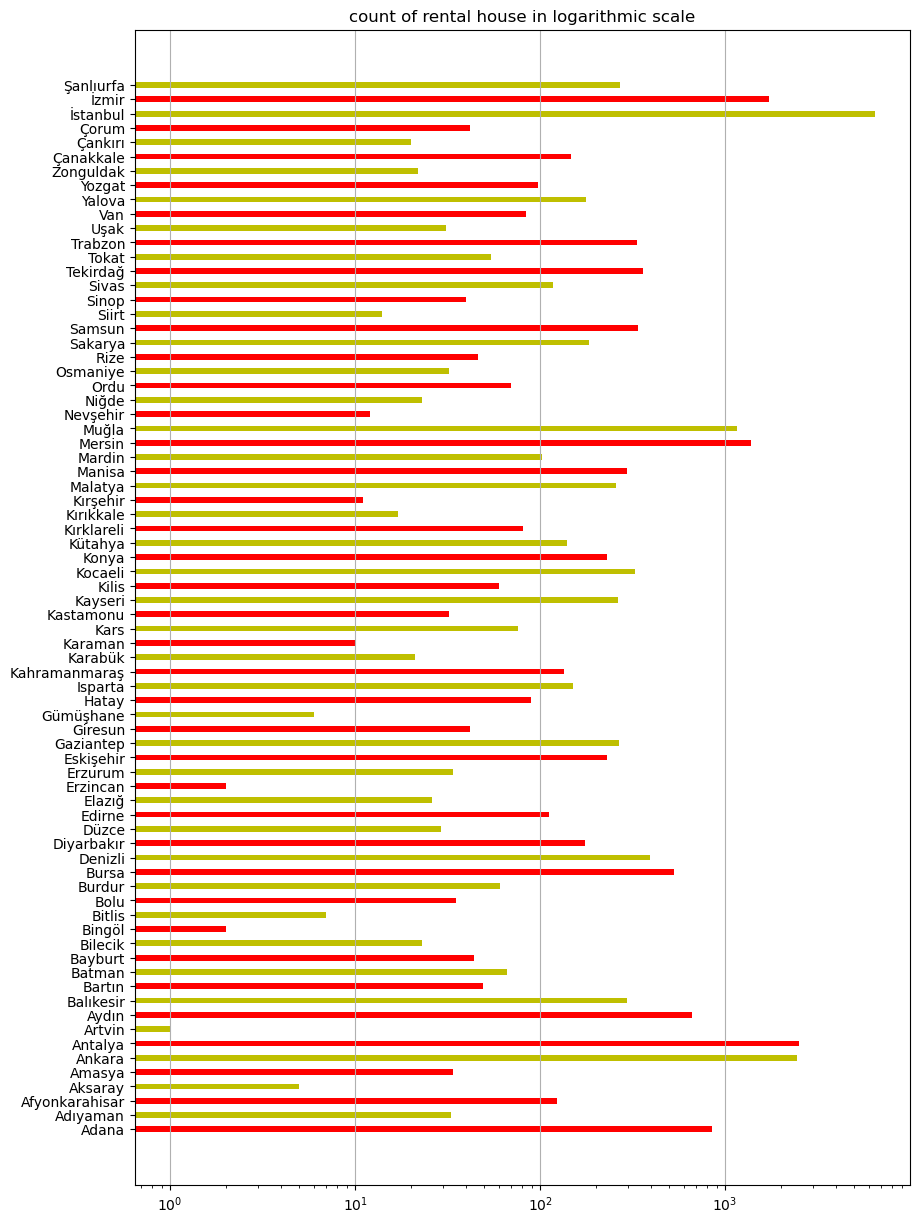

In [148]:
# count of rental house in logarithmic scale
df["constant"] = 1

y = df.groupby("city")["constant"].sum()
x = pd.DataFrame(y).index

plt.figure(figsize=(10, 15))
plt.grid(axis="x")
plt.xscale("log")

plt.barh(x, y, height=0.4,  color=["red","y"])
plt.title("count of rental house in logarithmic scale")
plt.show()

# 4- Machine Learning

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor  
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [17]:
d = pd.read_excel("adverts.xlsx")
d = d.drop("Unnamed: 0.1", axis=1)
d = d.drop("Unnamed: 0", axis=1)
df = d.copy()

In [18]:
df

,city,district,neighborhood,room,m²,price
0,Adana,Ceyhan,Cumhuriyet,2+1,130,7000
1,Adana,Ceyhan,Cumhuriyet,4+1,180,12000
2,Adana,Ceyhan,Cumhuriyet,2+1,115,7250
3,Adana,Ceyhan,Hürriyet,3+1,185,11500
4,Adana,Ceyhan,Ulus,3+1,165,9000
...,...,...,...,...,...,...
24602,Yozgat,Sorgun,Yeni,3+1,120,3500
24603,Yozgat,Yerköy,100. Yıl,3+1,135,4250
24604,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250
24605,Yozgat,Yerköy,100. Yıl,3+1,140,3250


In [19]:
# Assing dummy variable to columns for each room type
df = pd.get_dummies(df, columns=["room"], prefix=["room"])

In [20]:
# learn how many advert for each room type using cplumns that assing dummy 
arr= [df["room_1+0"].sum(), df["room_1+1"].sum(), df["room_2+1"].sum(), df["room_3+1"].sum(), df["room_4+1"].sum()]
arr

[478, 4720, 9125, 9054, 1230]

In [21]:
# Apply LabelEencoder transformation for 'city', 'district', 'neighborhood'
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the string column 'city'
df['city_le'] = le.fit_transform(df['city'])

# Encode the string column 'district'
df['district_le'] = le.fit_transform(df['district'])

# Encode the string column 'neighborhood'
df['neighborhood_le'] = le.fit_transform(df['neighborhood'])

In [22]:
df = df.drop(["city","district","neighborhood"], axis=1)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
m²,24607.0,112.512984,39.937221,20.0,85.0,110.0,140.0,230.0
price,24607.0,14503.486366,6926.190760,2000.0,10000.0,13000.0,17500.0,57500.0
room_1+0,24607.0,0.019425,0.138017,0.0,0.0,0.0,0.0,1.0
room_1+1,24607.0,0.191815,0.393737,0.0,0.0,0.0,0.0,1.0
room_2+1,24607.0,0.370829,0.483037,0.0,0.0,0.0,1.0,1.0
room_3+1,24607.0,0.367944,0.482256,0.0,0.0,0.0,1.0,1.0
room_4+1,24607.0,0.049986,0.217920,0.0,0.0,0.0,0.0,1.0
city_le,24607.0,41.843947,27.592971,0.0,8.0,48.0,71.0,73.0
district_le,24607.0,192.843134,107.174784,0.0,107.0,196.0,278.0,377.0
neighborhood_le,24607.0,1198.389361,722.557204,0.0,523.0,1202.0,1861.0,2403.0


In [24]:
df.head()

,m²,price,room_1+0,room_1+1,room_2+1,room_3+1,room_4+1,city_le,district_le,neighborhood_le
0,130,7000,0,0,1,0,0,0,88,486
1,180,12000,0,0,0,0,1,0,88,486
2,115,7250,0,0,1,0,0,0,88,486
3,185,11500,0,0,0,1,0,0,88,983
4,165,9000,0,0,0,1,0,0,88,1919


In [25]:
# Define dependet and independet variables

y = df["price"]
x = df.drop("price", axis=1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
# for learning rate"test_data/all_data" that 2+1 room type  
(x_test["room_2+1"].sum()) / (x_test["room_2+1"].sum() + x_train["room_2+1"].sum())

0.1978082191780822

In [28]:
x_train

,m²,room_1+0,room_1+1,room_2+1,room_3+1,room_4+1,city_le,district_le,neighborhood_le
2444,115,0,0,0,1,0,5,190,2310
9061,75,0,1,0,0,0,25,321,1471
21152,70,0,0,1,0,0,48,326,34
5472,150,0,0,0,1,0,6,234,2401
7563,130,0,0,0,1,0,18,251,521
...,...,...,...,...,...,...,...,...,...
21575,150,0,0,0,1,0,49,90,1097
5390,185,0,0,0,1,0,6,220,955
860,49,0,1,0,0,0,5,142,2302
15795,145,0,0,1,0,0,71,311,256


#### Creating machine learning models

In [29]:
# KNN regression
knn_model = KNeighborsRegressor().fit(x_train, y_train)

In [30]:
y_pred_knn = knn_model.predict(x_test)

In [31]:
mse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mse_knn

5199.242918971513

In [38]:
# Decision Tree regression
dec_tree = DecisionTreeRegressor().fit(x_train, y_train)

In [39]:
y_pred_tree = dec_tree.predict(x_test)

In [40]:
mse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mse_tree

5492.321605785524

In [41]:
# Random Forest regression
rf = RandomForestRegressor().fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
mse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mse_rf

4446.050573289556

In [ ]:
# Cat Boost regression
cat_boost = CatBoostRegressor().fit(x_train, y_train)
y_pred_cat = cat_boost.predict(x_test)
mse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))

In [43]:
mse_cat

4379.82048845411

In [44]:
# Bagged Trees regression
bag_model = BaggingRegressor(bootstrap_features = True).fit(x_train, y_train)
y_pred_bag = bag_model.predict(x_test)
mse_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))
mse_bag

4328.227013065296

In [ ]:
!pip install lightgbm

In [ ]:
lgbm_model = LGBMRegressor().fit(x_train, y_train)
y_pred_lgbm = lgbm_model.predict(x_test)

mse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

In [47]:
mse_lgbm

4494.111539045355

In [48]:
# Gradient Boosting regression
gbm_model = GradientBoostingRegressor().fit(x_train, y_train)
y_pred_gbm = gbm_model.predict(x_test)
mse_gbm = np.sqrt(mean_squared_error(y_test, y_pred_gbm))
mse_gbm

5095.58892687141

In [ ]:
!pip install xgboost

In [49]:
# XGBoost regression
xgb_model = XGBRegressor().fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
mse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mse_xgb


4277.446249084818

<BarContainer object of 8 artists>

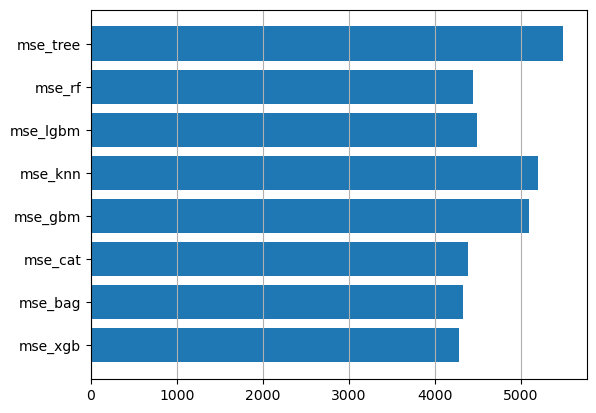

In [50]:
all_mse = pd.DataFrame({
    "x": ["mse_xgb","mse_bag","mse_cat","mse_gbm","mse_knn","mse_lgbm","mse_rf","mse_tree"],
    "y": [mse_xgb,mse_bag,mse_cat,mse_gbm,mse_knn,mse_lgbm,mse_rf,mse_tree]  
})

plt.grid(axis="x")
plt.barh(all_mse["x"], all_mse["y"])

In [ ]:
# XGB showed the best performance in this dataset

#### XGB model tuning

In [51]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [ ]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(x_train, y_train)

In [53]:
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 1000}

In [54]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.6, 
                         learning_rate = 0.1, 
                         max_depth = 6, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(x_train,y_train)

In [55]:
y_pred = xgb_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4170.643619635636

### Show estimated price and many useful output using XGB model based on entered infos 

In [56]:
def pred_price(city, district, neighborhood, room, metrekare):
  

    if city!="" and city not in d["city"].tolist():
        print("--------------------------------\n\nBöyle bir il bulunamadı ya da bu ilde ilan yok!\n")
        print("Şehir ismini doğru yazdığınızdan emin olun!\nŞehrin baş harfini büyük yazmayı deneyin!\n")
        return None    
    if district!="" and district not in d["district"].tolist():
        print("--------------------------------\n\nBöyle bir ilçe bulunamadı ya da bu ilçede ilan yok!\n")
        print("İlçe ismini doğru yazdığınızdan emin olun!\nİlçenin baş harfini büyük yazmayı deneyin!\n")
        return None
    if neighborhood!="" and neighborhood not in d["neighborhood"].tolist():
        print("--------------------------------\n\nBöyle bir mahalle bulunamadı ya da bu mahallede ilan yok!\n")
        print("Mahalle ismini doğru yazdığınızdan emin olun!\nMahallenin baş harfini büyük yazmayı deneyin!\n")
        return None


    
    if metrekare=="" and room=="1+0": 
        metrekare=40
        #print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="1+1": 
        metrekare=65
        #print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="2+1": 
        metrekare=100
        #print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="3+1": 
        metrekare=130
        #print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="4+1": 
        metrekare=160
        #print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="": 
        metrekare=110
        #print(f"       m²={metrekare} olarak hesaba katıldı!")
    else: 
        pass

    
    
    new = pd.DataFrame({"city":[city], "district":[district], "neighborhood":[neighborhood], "room":[room], "m²":[metrekare]})
    new["m²"] = pd.to_numeric(new["m²"])
       
    dff = d.drop("price", axis=1)
    dff = pd.concat([dff, new], axis=0)

    dff[""] = np.arange(len(dff))
    dff = dff.set_index("")

    # Get dummies the string column"room"
    dff = pd.get_dummies(dff, columns=["room"], prefix=["room"])

    # Encode the string column'city'
    dff['city_le'] = le.fit_transform(dff['city'])
    
    # Encode the string column'district'
    dff['district_le'] = le.fit_transform(dff['district'])
    
    # Encode the string column'neighborhood'
    dff['neighborhood_le'] = le.fit_transform(dff['neighborhood'])

    dff =dff.drop(["city","district","neighborhood"], axis=1)
   
    if room=="":
        dff = dff.drop("room_", axis=1)
    
    train_data = dff.iloc[24607:,:]
    pred = xgb_tuned.predict(train_data)
    #print(f"----------------------------\n\nGirilen bilgilere göre tahmini fiyat: {int(pred)} TL\n\n----------------------------")



    # write advertising infos according to inputs entered by user
    if city=="" and room!="":
        a=d[d["room"]==room]
        print(f"----------------------------\n\nTürkiye'de tahmini {room} kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        
        print(f"\nTürkiye'de toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
    
    elif district=="" and room!="":
        a=d[d["city"]==city]
        a=a[a["room"]==room]
        print(f"----------------------------\n\n{city} şehrinde tahmini {room} kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        if len(a)>=5: 
            last_q = a["price"].quantile(0.75) / a["m²"].quantile(0.75)
            first_q = a["price"].quantile(0.25) / a["m²"].quantile(0.25)
            print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{city} ilinde toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
   
    elif neighborhood=="" and room!="":
        a=d[d["district"]==district]
        a=a[a["room"]==room]
        print(f"----------------------------\n\n{district} ilçesinde tahmini {room} kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        if len(a)>=5: 
            last_q = a["price"].quantile(0.75) / a["m²"].quantile(0.75)
            first_q = a["price"].quantile(0.25) / a["m²"].quantile(0.25)
            print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{district} ilçesinde toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
        a=a.sort_values(by="price", ascending=True)
        print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")
   
    elif neighborhood != "" and room!="":
        a=d[d["district"]==district]
        a=a[a["neighborhood"]==neighborhood]
        a=a[a["room"]==room]
        print(f"----------------------------\n\n{neighborhood} mahallesinde tahmini {room} kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        if len(a)>=5: 
            last_q = a["price"].quantile(0.75) / a["m²"].quantile(0.75)
            first_q = a["price"].quantile(0.25) / a["m²"].quantile(0.25)
            print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{neighborhood} mahallesinde toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
        a=a.sort_values(by="price", ascending=True)
        print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")

    
    elif room=="" and city=="":
        print(f"----------------------------\n\nTürkiye'de tahmini kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        print(f"Türkiye'de toplam {len(d)} tane ilan var.\n\n----------------------------")
    
    elif room == "" and district=="":
        a=d[d["city"]==city]
        print(f"----------------------------\n\n{city} şehrinde tahmini kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        if len(a)>=5: 
            last_q = a["price"].quantile(0.75) / a["m²"].quantile(0.75)
            first_q = a["price"].quantile(0.25) / a["m²"].quantile(0.25)
            print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{city} ilinde toplam {len(a)} tane ilan var.\n\n----------------------------")
    
    elif room == "" and neighborhood=="":
        a=d[d["district"]==district]
        print(f"----------------------------\n\n{district} ilçesinde tahmini kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        if len(a)>=5: 
            last_q = a["price"].quantile(0.75) / a["m²"].quantile(0.75)
            first_q = a["price"].quantile(0.25) / a["m²"].quantile(0.25)
            print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{district} ilçesinde toplam {len(a)} tane ilan var.\n\n----------------------------")
        a=a.sort_values(by="price", ascending=True)
        print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")
    
    elif room == "" and neighborhood!="":
        a=d[d["city"]==city]
        a=a[a["neighborhood"]==neighborhood]
        print(f"----------------------------\n\n{neighborhood} mahallesinde tahmini kira fiyatı: {int(pred)} TL\n\n----------------------------")     
        if len(a)>=5: 
            last_q = a["price"].quantile(0.75) / a["m²"].quantile(0.75)
            first_q = a["price"].quantile(0.25) / a["m²"].quantile(0.25)
            print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{neighborhood} mahallesinde toplam {len(a)} tane ilan var.\n\n----------------------------")
        a=a.sort_values(by="price", ascending=True)
        print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")
    
    else:
        pass



In [57]:

print("İstediğiniz şekilde filtreleme yapınız.\n")

city = ""
city = input("City: ")
district = ""
district = input("District: ")
neighborhood = ""
neighborhood = input("Neighborhood: ")
room = ""
room = input("Rooms: ")
metrekare = ""
metrekare = input("Meter: ")

# Sent inputs to pred_price function
pred_price(city,district,neighborhood,room,metrekare)


İstediğiniz şekilde filtreleme yapınız.



City:  Manisa
District:  Alaşehir
Neighborhood:  
Rooms:  2+1
Meter:  


----------------------------

Alaşehir ilçesinde tahmini 2+1 kira fiyatı: 7734 TL

----------------------------

Ortalama metrekare fiyatı 61TL - 66TL aralığında.

En düşük fiyat: 4000 
En yüksek fiyat: 8250

Alaşehir ilçesinde toplam 6 tane 2+1 ilan var.

----------------------------

Girilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':

  city district neighborhood room  m²  price
Manisa Alaşehir     Beşeylül  2+1 120   4000
Manisa Alaşehir     Kurtuluş  2+1  95   6000
Manisa Alaşehir     İstasyon  2+1 115   6500
Manisa Alaşehir     Kurtuluş  2+1 120   8000
Manisa Alaşehir     İstasyon  2+1 130   8000
Manisa Alaşehir     Kurtuluş  2+1  90   8250
